In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
mpl.rc('font', family='Malgun Gothic')

In [2]:
expert=pd.read_csv('Expert_Data.csv')
customer=pd.read_csv('Customer_data.csv')
log=pd.read_csv('Log_Data02.csv')
service=pd.read_csv('Service_Data.csv')

In [91]:
#DDA
#판매 서비스 수, 서비스 가격, 서비스 평점 등의 연속형 변수들의 분포확인 (histogram)
h1=px.histogram(expert,x='판매 서비스 수')
h2=px.histogram(log,x='수수료율')
h3=px.histogram(log,x='서비스가격')
# 이상치 확인
expert.info()
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   판매자ID           2066 non-null   object
 1   판매자             2066 non-null   object
 2   판매 서비스 수        2066 non-null   int64 
 3   총 판매 금액         2066 non-null   int64 
 4   프리미엄 서비스 가입여부   2066 non-null   object
 5   신속 알람 서비스 사용여부  2066 non-null   object
dtypes: int64(2), object(4)
memory usage: 97.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344299 entries, 0 to 344298
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      344299 non-null  int64  
 1   수수료율      344299 non-null  float64
 2   고객ID      344299 non-null  int64  
 3   프로그램수정횟수  344299 non-null  float64
 4   추가결제금액    344299 non-null  int64  
 5   거래취소여부    4597 non-null    float64
 6   거래취소일자    4597 non-null    float64
 7   서비스명      34427

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344299 entries, 0 to 344298
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      344299 non-null  int64  
 1   수수료율      344299 non-null  float64
 2   고객ID      344299 non-null  int64  
 3   프로그램수정횟수  344299 non-null  float64
 4   추가결제금액    344299 non-null  int64  
 5   거래취소여부    4597 non-null    float64
 6   거래취소일자    4597 non-null    float64
 7   서비스명      344277 non-null  object 
 8   판매자       344277 non-null  object 
 9   판매금액      344278 non-null  float64
 10  서비스가격     344277 non-null  float64
 11  평점        344277 non-null  float64
 12  이용자수      344277 non-null  float64
 13  대분류       344277 non-null  object 
 14  서비스번호     344277 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 39.4+ MB


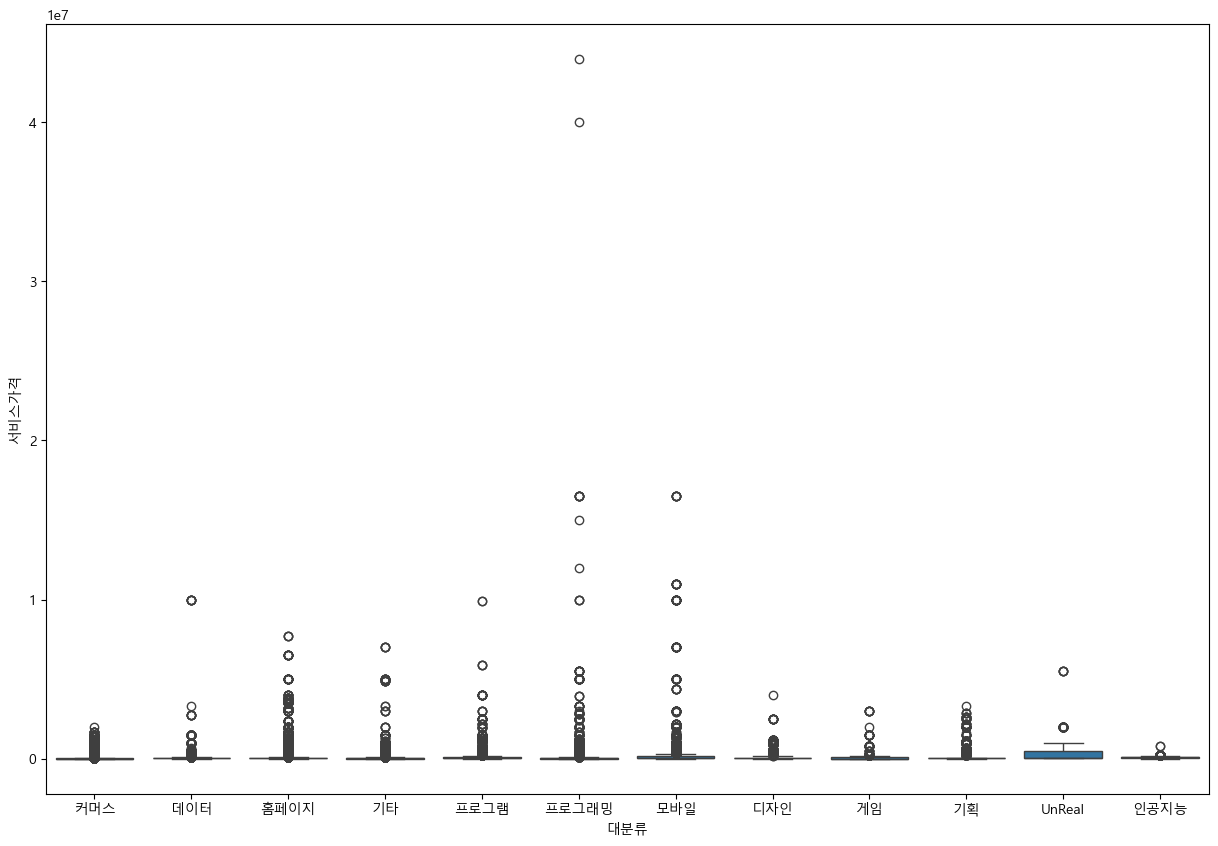

In [107]:
#서비스 대분류 별 서비스 가격 분포 및 이상치 확인

plt.figure(figsize=(15, 10))
sns.boxplot(data=log,x='대분류',y='서비스가격')


#이상치 확인
log.info()

In [ ]:
Solution

#판매자와 소비자에게 차별화된 서비스 지원 전략 
: 판매자의 응답 지연으로 소비자 불만족 > 판매자에게 신속알람서비스 신청 설득
: 판매자에게 프리미엄 서비스 홍보 후 설득

<신속알람서비스 신청여부에 따른 판매 서비스 수 비교>
ㄱ. expert  데이터에서 신속 알람 서비스 사용여부에 따라 집단 나누기
ㄴ. 두 집단 평균 판매 서비스 수 구하기 (pivot table 이용)
ㄷ. 두 집단 평균 판매 서비스 수 차이가 유의미한지 검정하기 (normaltest,Q-Q plot, Mann-Whitney U 검정)
    Q-Q plot을 쓰는 이유? : 분포 모양에 따라서 검정 방법이 달라지기 때문에
    Mann-Whitney U 검정을 쓰는 이유? : 두 집단 판매 서비스 수의 분포가 다르고, 이상치가 존재하는 데이터 검정에 최적화 되어 있기 때문.
ㄹ. 두 집단 평균 판매 서비스 수 차이 시각화 > 판매자 설득 자료 (barplot 이용)

<프리미엄서비스 구독여부에 따른 판매 서비스 수 비교> : 신속 알람 서비스 신청여부 과정과 같음
ㅁ. expert  데이터에서 프리미엄서비스 구독여부에 따라 집단 나누기
ㅂ. 두 집단 평균 판매 서비스 수 구하기 (pivot table 이용)
ㅅ. 두 집단 평균 판매 서비스 수 차이가 유의미한지 검정하기 (normaltest,Q-Q plot, Mann-Whitney U 검정)
    Q-Q plot을 쓰는 이유? : 분포 모양에 따라서 검정 방법이 달라지기 때문에
    Mann-Whitney U 검정을 쓰는 이유? : 두 집단 판매 서비스 수의 분포가 다르고, 이상치가 존재하는 데이터 검정에 최적화 되어 있기 때문.
ㅇ. 두 집단 평균 판매 서비스 수 차이 시각화 > 판매자 설득 자료 (barplot 이용)

#같은 분야 내 서비스 가격 범위 제한 통해 소비자 이탈 방지 전략
<서비스 대분류 별 서비스 금액 절단 평균으로 범위정하기>
ㅈ. 서비스 대분류 별 서비스 가격 적정범위 구하는 함수 > 이상치가 많아 절단평균 이용 상하범위 구하기
#등급에 따른 적정 수수료율 책정을 통해 실력 좋은 전문가 이탈 방지 전략
<적정 수수료율 책정 모델>
  1.  수수료율 =  판매 건 수, 재거래율, 평점 다중선형회귀로 상관계수 구한 다음, 높은 순서대로 판매자에게 줄 점수 정하기
  2.  k-means 클러스터링으로 다섯 그룹 생성
  3.  등급에 맞는 적정 수수료 도출하는 모델

In [12]:
#ㄱ.expert  데이터에서 신속 알람 서비스 사용여부에 따라 집단 나누기
cond1=(expert['신속 알람 서비스 사용여부']=='사용')
cond2=(expert['신속 알람 서비스 사용여부']=='미사용')
alarm_service_on=expert.loc[cond1]
alarm_service_off=expert.loc[cond2]

In [38]:
#ㄴ.두 집단 평균 판매 서비스 수 구하기
p1=expert.pivot_table(index='신속 알람 서비스 사용여부',values='판매 서비스 수',aggfunc='mean')
p1=p1.rename(columns={'판매 서비스 수' : '평균 판매 서비스 수'})

In [39]:
#ㄷ. 두 집단 평균 판매 서비스 수 차이가 유의미한지 검정하기
#H0: 판매 서비스 수는 정규분포를 따른다
#H1: 판매 서비스 수는 정규분포를 따르지 않는다.
print(stats.normaltest(alarm_service_on['판매 서비스 수']))
print(stats.normaltest(alarm_service_off['판매 서비스 수']))
#두 집단에 대해 모두 귀무가설 기각, 두 집단 모두 정규분포를 따르지 않는다.

NormaltestResult(statistic=185.38831451962912, pvalue=5.539097342634006e-41)
NormaltestResult(statistic=3162.5299581347904, pvalue=0.0)


C:\ProgramData\anaconda33\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



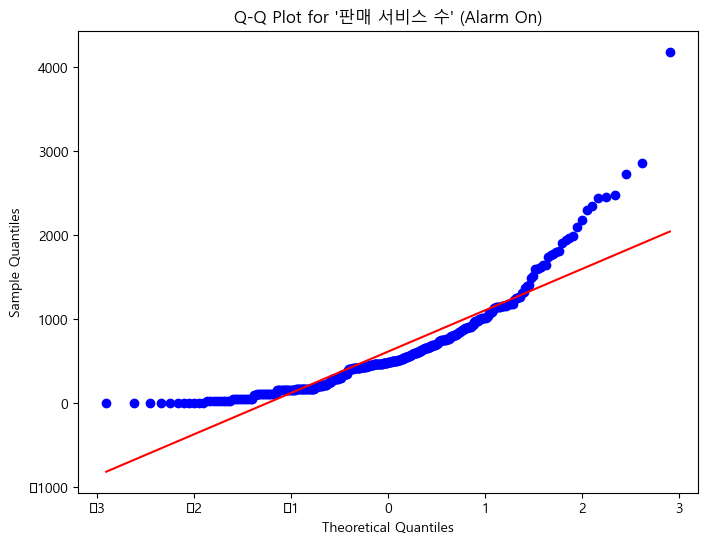

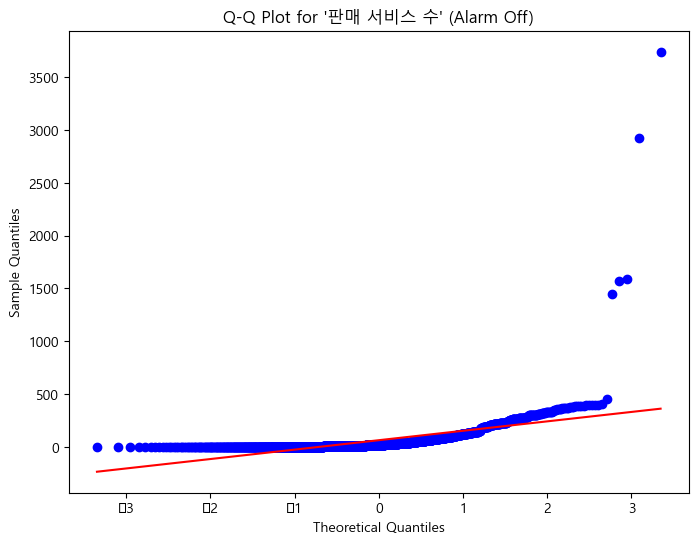

In [40]:
#ㄷ. Q-Q plot으로 두 집단 분포 모양 확인하기
# 두 집단 간 분포가 다르다.
plt.figure(figsize=(8, 6))
stats.probplot(alarm_service_on['판매 서비스 수'], dist="norm", plot=plt)
plt.title("Q-Q Plot for '판매 서비스 수' (Alarm On)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(alarm_service_off['판매 서비스 수'], dist="norm", plot=plt)
plt.title("Q-Q Plot for '판매 서비스 수' (Alarm Off)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [41]:
#ㄷ. Mann-Whitney U 검정 (이상치가 존재할 때)
    #H0: 두 집단의 평균 판매 서비스 수 차이는 유의미하지 않다.
    #H1: 두 집단의 평균 판매 서비스 수 차이는 유의미하다.
u_stat, p_value = stats.mannwhitneyu(alarm_service_on['판매 서비스 수'] , alarm_service_off['판매 서비스 수'])
u_stat, p_value
# 귀무가설 기각, 두 집단간의 평균 판매 서비스 수 차이가 유의미하다고 볼 수 있다.

(595672.0, 1.7645843904031893e-152)

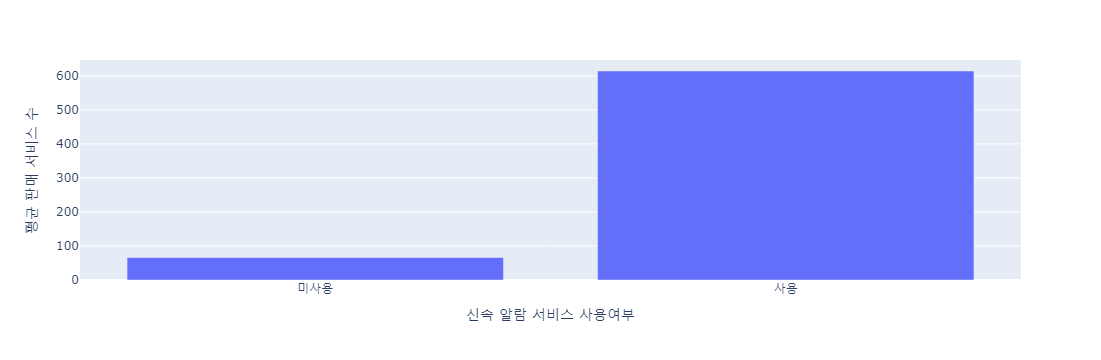

In [43]:
#ㄹ. 두 집단 평균 판매 서비스 수 차이 시각화 > 판매자 설득 자료 (barplot 이용)
px.bar(p1.reset_index(),x='신속 알람 서비스 사용여부',y='평균 판매 서비스 수')

In [45]:
#ㅁ.expert  데이터에서 프리미엄 서비스 가입여부에 따라 집단 나누기
cond1=(expert['프리미엄 서비스 가입여부']=='가입')
cond2=(expert['프리미엄 서비스 가입여부']=='미가입')
premium_service_on=expert.loc[cond1]
premium_service_off=expert.loc[cond2]

In [46]:
#ㅂ.두 집단 평균 판매 서비스 수 구하기
p2=expert.pivot_table(index='프리미엄 서비스 가입여부',values='판매 서비스 수',aggfunc='mean')
p2=p2.rename(columns={'판매 서비스 수' : '평균 판매 서비스 수'})

In [47]:
#ㅅ. 두 집단 평균 판매 서비스 수 차이가 유의미한지 검정하기
#H0: 판매 서비스 수는 정규분포를 따른다
#H1: 판매 서비스 수는 정규분포를 따르지 않는다.
print(stats.normaltest(premium_service_on['판매 서비스 수']))
print(stats.normaltest(premium_service_off['판매 서비스 수']))
#두 집단에 대해 모두 귀무가설 기각, 두 집단 모두 정규분포를 따르지 않는다.

NormaltestResult(statistic=185.89092008295125, pvalue=4.308236998154919e-41)
NormaltestResult(statistic=1765.6962999240452, pvalue=0.0)


C:\ProgramData\anaconda33\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



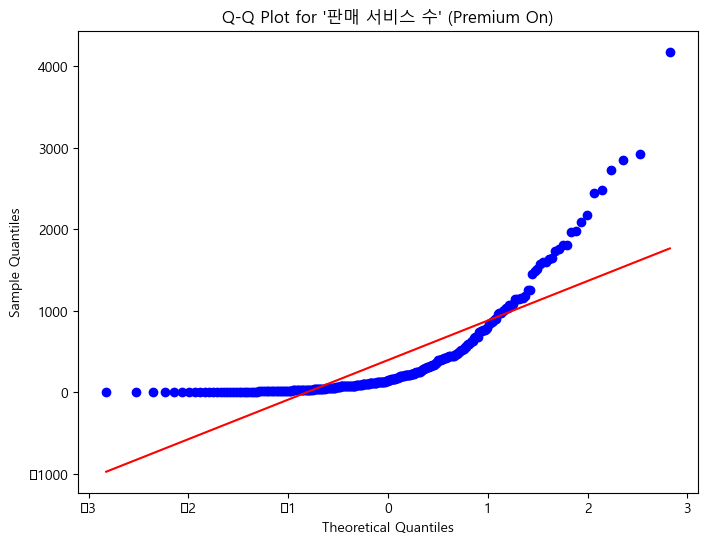

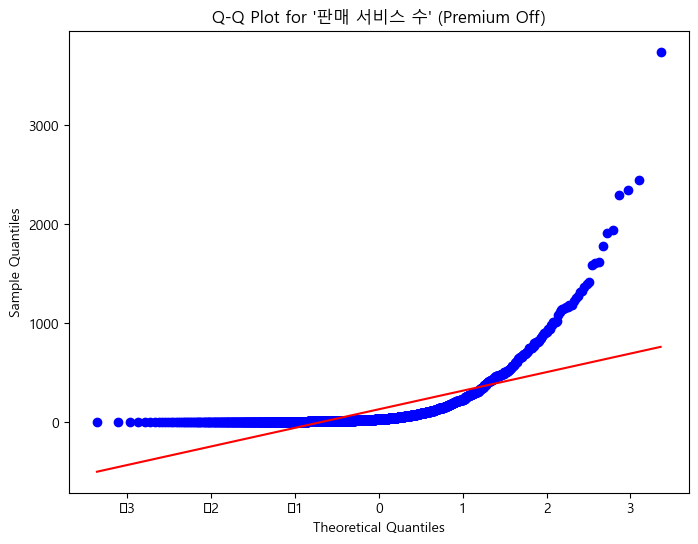

In [48]:
#ㅅ. Q-Q plot으로 두 집단 분포 모양 확인하기
# 두 집단 간 분포가 다르다.
plt.figure(figsize=(8, 6))
stats.probplot(premium_service_on['판매 서비스 수'], dist="norm", plot=plt)
plt.title("Q-Q Plot for '판매 서비스 수' (Premium On)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(premium_service_off['판매 서비스 수'], dist="norm", plot=plt)
plt.title("Q-Q Plot for '판매 서비스 수' (Premium Off)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [49]:
#ㅅ. Mann-Whitney U 검정 (이상치가 존재할 때)
    #H0: 두 집단의 평균 판매 서비스 수 차이는 유의미하지 않다.
    #H1: 두 집단의 평균 판매 서비스 수 차이는 유의미하다.
u_stat, p_value = stats.mannwhitneyu(premium_service_on['판매 서비스 수'] , premium_service_off['판매 서비스 수'])
u_stat, p_value
# 귀무가설 기각, 두 집단간의 평균 판매 서비스 수 차이가 유의미하다고 볼 수 있다.

(369956.0, 7.229633444045209e-32)

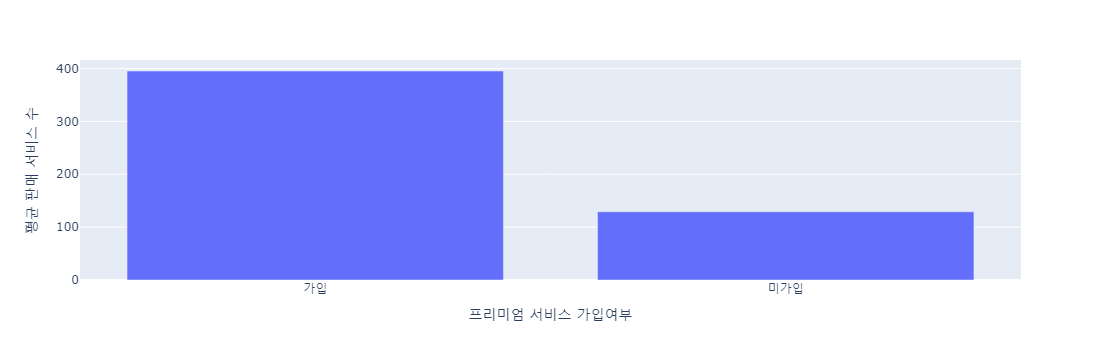

In [52]:
#ㅇ. 두 집단 평균 판매 서비스 수 차이 시각화 > 판매자 설득 자료 (barplot 이용)
px.bar(p2.reset_index(),x='프리미엄 서비스 가입여부',y='평균 판매 서비스 수')

In [70]:
#ㅈ. 서비스 대분류 별 서비스 가격 적정범위 구하는 함수
from scipy.stats import trim_mean
def service_price_range(x,log):
    category=log['대분류'].unique()
    if x in category:
        p2=log.loc[log['대분류'] == x]
        # 상위와 하위 5%의 데이터를 잘라낸 평균
        trimmed_mean = trim_mean(p2['서비스가격'], proportiontocut=0.05)

        # IQR 계산
        Q1 = p2['서비스가격'].quantile(0.25)
        Q3 = p2['서비스가격'].quantile(0.75)
        IQR = Q3 - Q1

        # 절단 평균을 기준으로 적정 가격 범위 설정
        lower_bound = trimmed_mean - 0.5 * IQR
        upper_bound = trimmed_mean + 0.5 * IQR
        print("대분류:", x)
        print("적정 가격 범위:", lower_bound, "부터", upper_bound)
    else:
        print(f"{x}는 '대분류'에 존재하지 않습니다.")
x=input('대분류 중 하나를 입력하세요(커머스, 데이터, 홈페이지,기타,프로그램,프로그래밍, 모바일, 디자인,게임, 기획,UnReal,인공지능):  ')    
service_price_range(x,log)

대분류 중 하나를 입력하세요(커머스, 데이터, 홈페이지,기타,프로그램,프로그래밍, 모바일, 디자인,게임, 기획,UnReal,인공지능):   커머스


대분류: 커머스
적정 가격 범위: 7461.363071055468 부터 17461.363071055468
